### Exercise 7.1
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

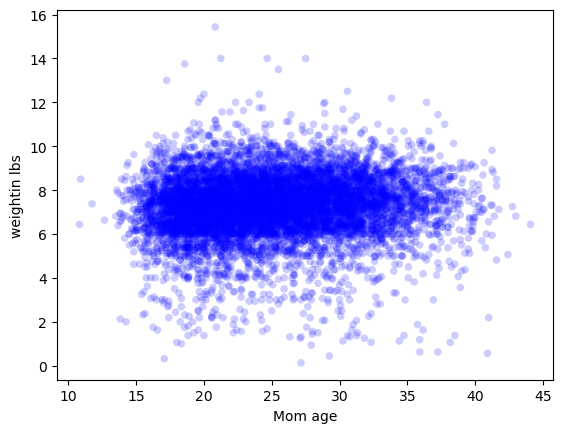

Mom age and baby weight Correlation is 0.06883397035410908
Mom age and baby weight Spearman correlation is 0.09461004109658226


<Figure size 800x600 with 0 Axes>

In [37]:
import sys
import numpy as np
import math

import first
import thinkplot
import thinkstats2
from scipy import stats

#read data and build dataframe
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

#plot scatter plot of birth weight and mom's age
age = live.agepreg
weight =live.totalwgt_lb
thinkplot.Scatter(age, weight)
thinkplot.show(xlabel='Mom age', ylabel ='weightin lbs')

print('Mom age and baby weight Correlation is', thinkstats2.Corr(age, weight))
print('Mom age and baby weight Spearman correlation is', thinkstats2.SpearmanCorr(age, weight))

In [14]:
#bin the data
bins = np.arange(10, 48, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

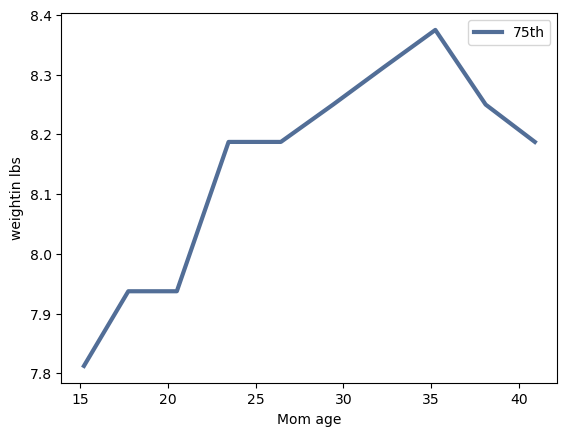

<Figure size 800x600 with 0 Axes>

In [35]:
#Plot cdf = 75%

weights = [cdf.Percentile(75) for cdf in cdfs]
thinkplot.Plot(ages, weights, label='75th')
thinkplot.show(xlabel='Mom age', ylabel ='weightin lbs')


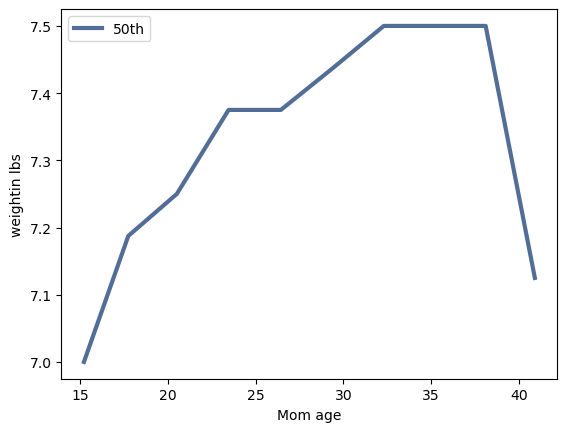

<Figure size 800x600 with 0 Axes>

In [36]:
#Plot cdf = 50%

weights = [cdf.Percentile(50) for cdf in cdfs]
thinkplot.Plot(ages, weights, label='50th')
thinkplot.show(xlabel='Mom age', ylabel ='weightin lbs')


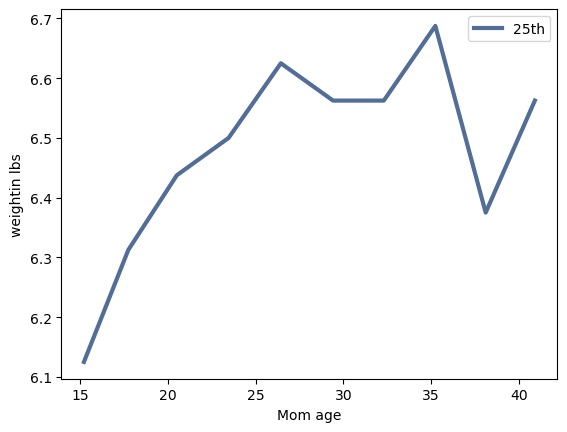

<Figure size 800x600 with 0 Axes>

In [37]:
#Plot cdf = 25%

weights = [cdf.Percentile(25) for cdf in cdfs]
thinkplot.Plot(ages, weights, label='25th')
thinkplot.show(xlabel='Mom age', ylabel ='weightin lbs')


### Conclusion for exercise 7.1:
1. For mom's age below 25, there are stronger positive relationship between Mom's age and baby weight. After age of 35, the weight is likely reduced with increase of mom's age. Overall the relationship is not linear. 
2. Scatter plot shows there are some outliner on both high and low baby weight. from the Correlation and Spearman Correlation it shows the relationship between mom's age and baby's weight is weak. 

### Exercise 8.1:
X-bar and median are used to estimate μ. Run similar experiments to see if X-bar and median are biased estimates of μ. Also check whether S2 or  yields a lower MSE.

In [6]:
import random
from estimation import RMSE, MeanError

thinkstats2.RandomSeed(17)

n=7
m=100000

mu = 0
sigma = 1

means = []
medians = []

#iterate 100K times for smaple size of 7
for _ in range(m):
     xs = [random.gauss(mu, sigma) for i in range(n)]
     xbar = np.mean(xs)
     median = np.median(xs)
     means.append(xbar)
     medians.append(median)
        
estimates1 = []
estimates2 = []

for _ in range(m):
     xs = [random.gauss(mu, sigma) for i in range(n)]
     biased = np.var(xs)
     unbiased = np.var(xs, ddof=1)
     estimates1.append(biased)
     estimates2.append(unbiased)
        
print('mean error xbar', MeanError(means, mu))
print('mean error median', MeanError(medians, mu)) 
print('RMSE biased', RMSE(estimates1, sigma**2))
print('RMSE unbiased', RMSE(estimates2, sigma**2))   

mean error xbar 0.0009731646745573733
mean error median 0.0009977514720499036
RMSE biased 0.5160608912798944
RMSE unbiased 0.57826602081194


#### Conclusion: 
1. When time of play increased from 10K (example in textbook) to 100K, the mean error of Xbar and median are both decresed. so it is likely they are not biased. 
2. The biased estimator yielded less RSME than unbiased.

### Exercise 8.2:
Suppose that you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

for sample size of 10, standard error is 0.83
90% confidence interval for sample szie 10:  1.24 to 3.7


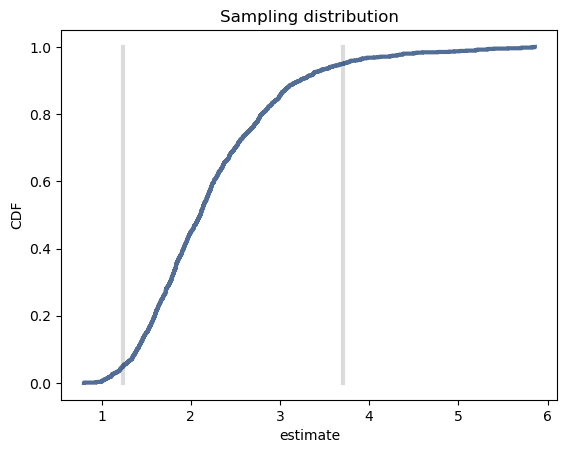

<Figure size 800x600 with 0 Axes>

In [39]:
lam=2
n=10 
m=1000

def VertLine(x, y=1):
     thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

estimates = []
for j in range(m):
    xs = np.random.exponential(1/lam, n)
    lamhat = 1/np.mean(xs)
    estimates.append(lamhat)

stderr = RMSE(estimates, lam)
print('for sample size of 10, standard error is', round(stderr, 3))

#calculate the cdf
cdf = thinkstats2.Cdf(estimates)
ci = cdf.Percentile(5), cdf.Percentile(95)
print('90% confidence interval for sample szie 10: ', round(ci[0],2), 'to', round (ci[1],2))
VertLine(ci[0])
VertLine(ci[1])
      
# plot the CDF
thinkplot.Cdf(cdf)
thinkplot.show(root='estimation2',
               xlabel='estimate',
               ylabel='CDF',
               title='Sampling distribution')
      
        

#### now calculate with sample size n = 50 and 300

In [34]:
n2 = 50
estimates = []
for j in range(m):
    xs2 = np.random.exponential(1/lam, n2)
    lamhat = 1/np.mean(xs2)
    estimates.append(lamhat)

stderr2 = RMSE(estimates, lam)

#calculate the cdf
cdf = thinkstats2.Cdf(estimates)
ci2 = cdf.Percentile(5), cdf.Percentile(95)

n3 = 500
estimates = []
for j in range(m):
    xs3 = np.random.exponential(1/lam, n3)
    lamhat = 1/np.mean(xs3)
    estimates.append(lamhat)

stderr3 = RMSE(estimates, lam)

#calculate the cdf
cdf = thinkstats2.Cdf(estimates)
ci3 = cdf.Percentile(5), cdf.Percentile(95)

print('standard error for sampel size 50 is', round(stderr2,3))
print('standard error for sample size 500 is', round(stderr3,3))
print('\n')
print('90% confidence interval for sample size 50 are', round(ci2[0],2), 'to', round (ci2[1],2))
print('90% confidence interval for sample size 500 are', round(ci3[0],2), 'to', round (ci3[1],2))

standard error for sampel size 50 is 0.31
standard error for sample size 500 is 0.092


90% confidence interval for sample size 50 are 1.6 to 2.6
90% confidence interval for sample size 500 are 1.87 to 2.16


#### Conclusion:

with sample size increases, the standard error of the estimate decreased, the confidence interval decreased as well. 